In [1]:
#we will visualize stocks and use montecarlo tecniques to predict prices

# STOCK MARKET ANALYSIS
1- what was the daily change in price and daily return in average?
2- correlation with closing prices and daily return
3- how much value we put at RISK and we will see RISK analysis
4- predict future stock behaviour based on previous stock behaviours 

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #this is going to give us a nice grid background
%matplotlib inline 
#to see plots in notebook

In [4]:
import pandas_datareader as pdr
from datetime import datetime #start and ending for our data grab

In [5]:
#we will use apple goolge amazon tech stocks! 

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
#now set end and start time for data grab
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    print(stock)
    globals()[stock] = pdr.get_data_yahoo(stock, start, end, interval='d')

AAPL
GOOG
MSFT
AMZN


In [9]:
AAPL.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-10-15  221.830002  217.270004  221.160004  217.360001  30791000.0   
2018-10-16  222.990005  216.759995  218.929993  222.149994  29184000.0   
2018-10-17  222.639999  219.339996  222.300003  221.190002  22885400.0   
2018-10-18  219.740005  213.000000  217.860001  216.020004  32581300.0   
2018-10-19  221.259995  217.429993  218.059998  219.309998  33078700.0   

             Adj Close  
Date                    
2018-10-15  214.038605  
2018-10-16  218.755417  
2018-10-17  217.810089  
2018-10-18  212.719086  
2018-10-19  215.958801

In [10]:
GOOG.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2018-10-15  1113.446045  1089.000000  1108.910034  1092.250000  1372400   
2018-10-16  1124.219971  1102.500000  1104.589966  1121.280029  1928500   
2018-10-17  1128.989990  1102.189941  1126.459961  1115.689941  1467200   
2018-10-18  1121.839966  1077.089966  1121.839966  1087.969971  2094500   
2018-10-19  1110.359985  1087.750000  1093.369995  1096.459961  1267600   

              Adj Close  
Date                     
2018-10-15  1092.250000  
2018-10-16  1121.280029  
2018-10-17  1115.689941  
2018-10-18  1087.969971  
2018-10-19  1096.459961

In [11]:
#so now we have all dataframe and stocks information! 

In [12]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02   
mean   194.019320  190.060920  191.999680  192.078560  3.202019e+07   
std     21.050389   20.918327   20.930724   20.961146  1.343458e+07   
min    145.720001  142.000000  143.979996  142.190002  1.136200e+07   
25%    175.902496  173.362499  174.737499  174.757500  2.225975e+07   
50%    198.750000  193.805000  196.364998  196.345001  2.865870e+07   
75%    209.089996  205.104996  207.449997  207.479996  3.854895e+07   
max    237.639999  232.309998  232.949997  236.210007  9.574460e+07   

        Adj Close  
count  250.000000  
mean   190.809474  
std     21.256216  
min    140.505798  
25%    173.279305  
50%    195.165611  
75%    206.476418  
max    236.210007

In [13]:
AAPL.info() #srtructure of data frame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-10-15 to 2019-10-11
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


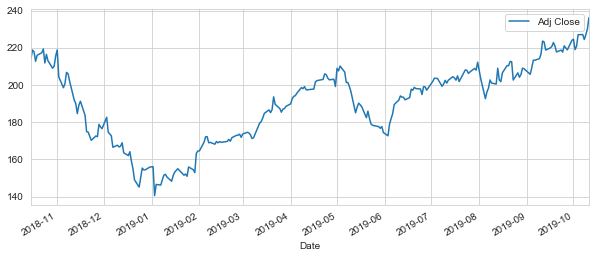

In [14]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4)) #that's the adjustive close price of one year of APPLE stocks

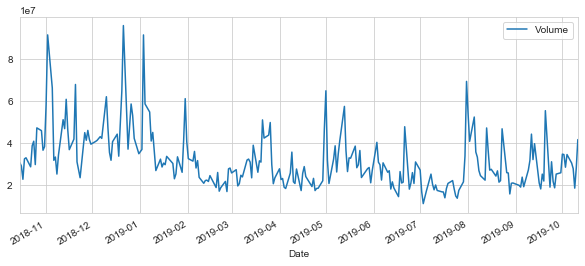

In [15]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))#plot the total volume of stocks traded each day 

In [16]:
#now calculate the moving average of the stocks - taking averages price and calculate mean value for x period of time
url='https://www.investopedia.com/terms/m/movingaverage.asp'

In [17]:
ma_day = [10,20,50] #these are the periods of time interval we want to calculate the movingaverage 

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

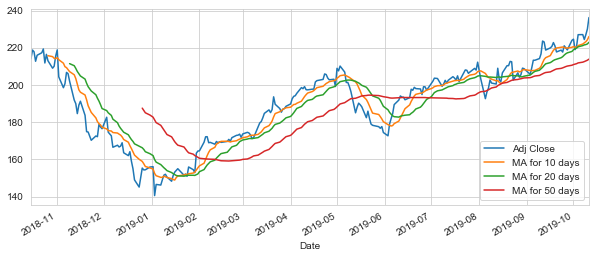

In [18]:
#lets visualize the moving averages and this can be good to understand the behaviour of a stock! 
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

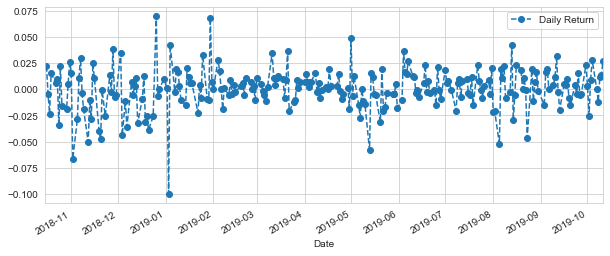

In [19]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() #the percentage change of the adjusting closing column
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

In [20]:
#now you have your daily returns on any given day which is the percentage return of your money
#we can analyze risk of stocks based on this behaviour

In [21]:
#lets use histogram to see the average return now!

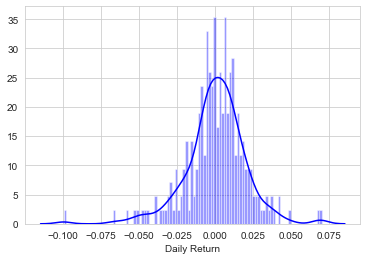

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'blue')

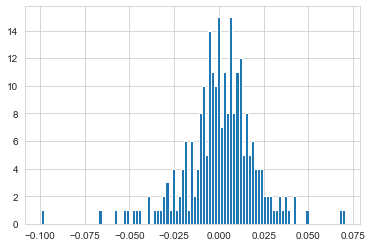

In [23]:
#similar to seaborn but seaborn allow us to use multiple graphs in one go
AAPL['Daily Return'].hist(bins=100)

In [24]:
#create a new dataframe
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']
closing_df.head()

Symbols           AAPL         AMZN         GOOG        MSFT
Date                                                        
2018-10-15  214.038605  1760.949951  1092.250000  105.935349
2018-10-16  218.755417  1819.959961  1121.280029  109.282745
2018-10-17  217.810089  1831.729980  1115.689941  108.997238
2018-10-18  212.719086  1770.719971  1087.969971  106.821426
2018-10-19  215.958801  1764.030029  1096.459961  106.978958

In [25]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols         AAPL      AMZN      GOOG      MSFT
Date                                              
2018-10-15       NaN       NaN       NaN       NaN
2018-10-16  0.022037  0.033510  0.026578  0.031598
2018-10-17 -0.004321  0.006467 -0.004985 -0.002613
2018-10-18 -0.023374 -0.033307 -0.024846 -0.019962
2018-10-19  0.015230 -0.003778  0.007804  0.001475

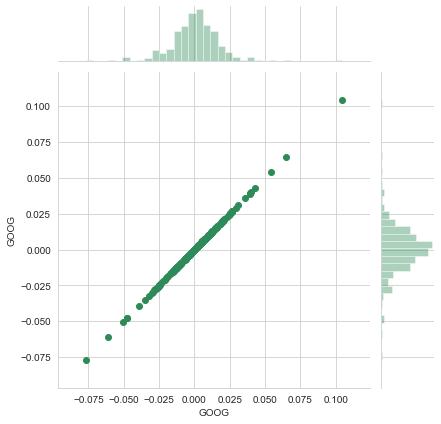

In [26]:
#we can now compare the daily percentage closing stocks
#we going to use jointplots from seaborn to compare multiple columns
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

In [27]:
#we have a perfectly linear relationship here since we are comparing the same dataset google and google

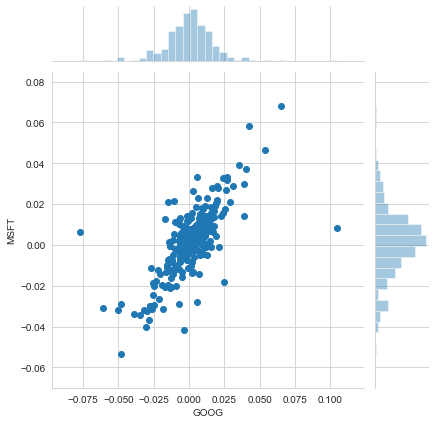

In [28]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

# pearson product-momentum correlation coefficcient
url='https://en.wikipedia.org/wiki/Pearson_correlation_coefficient'

In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC) or the bivariate correlation,[1] is a measure of the linear correlation between two variables X and Y.

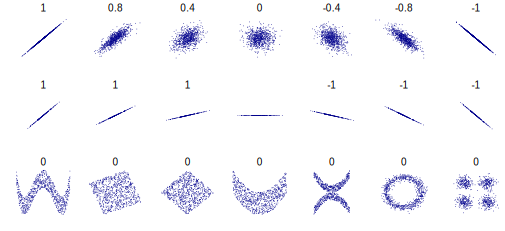

In [29]:
from IPython.display import SVG

SVG(url='https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')